In [20]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

# Defining column names for datasets
COLUMN_NAMES = [
        'SepalLength', 
        'SepalWidth',
        'PetalLength', 
        'PetalWidth', 
        'Species'
        ]

In [33]:
batch_size = 512
# Import training dataset
training_dataset = pd.read_csv('iris_training.csv', names=COLUMN_NAMES, header=0)
train_x = training_dataset.iloc[:, 0:4].values
train_y = training_dataset.iloc[:, 4].values

# Encoding training dataset
encoding_train_y = np_utils.to_categorical(train_y)

# Import testing dataset
test_dataset = pd.read_csv('iris_test.csv', names=COLUMN_NAMES, header=0)
test_x = test_dataset.iloc[:, 0:4].values
test_y = test_dataset.iloc[:, 4].values

# Encoding training dataset
encoding_test_y = np_utils.to_categorical(test_y)

In [34]:
test_dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1
5,6.2,2.9,4.3,1.3,1
6,5.5,4.2,1.4,0.2,0
7,6.3,2.8,5.1,1.5,2
8,5.6,3.0,4.1,1.3,1
9,6.7,2.5,5.8,1.8,2


In [35]:
# Creating a model
model_1 = Sequential()
model_1.add(Dense(10, input_dim=4, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(3, activation='softmax'))
model_1.name="model_1"

model_2 = Sequential()
model_2.add(Dense(10, input_dim=4, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(3, activation='softmax'))
model_2.name="model_2"

models = [model_1, model_2]


In [36]:
train_x, validate_x, train_y, validate_y = train_test_split(train_x, train_y, test_size = 0.2, random_state=12345)

In [37]:
for model in models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_22 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_23 (De

In [38]:
history_dict = {}
for model in models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer = Adam(),
        metrics=['accuracy'])
    history = model.fit(
        train_x, train_y,
        batch_size=batch_size,
        epochs=300, verbose=True,
        validation_data=(validate_x, validate_y))
    history_dict[model.name] = history
    

Train on 96 samples, validate on 24 samples
Epoch 1/300
96/96 [==============================] - 0s 3ms/step - loss: 1.1819 - acc: 0.1250 - val_loss: 1.3539 - val_acc: 0.0833
Epoch 2/300
96/96 [==============================] - 0s 24us/step - loss: 1.1730 - acc: 0.0833 - val_loss: 1.3235 - val_acc: 0.0417
Epoch 3/300
96/96 [==============================] - 0s 24us/step - loss: 1.1615 - acc: 0.0729 - val_loss: 1.2941 - val_acc: 0.0833
Epoch 4/300
96/96 [==============================] - 0s 23us/step - loss: 1.1509 - acc: 0.0833 - val_loss: 1.2657 - val_acc: 0.0833
Epoch 5/300
96/96 [==============================] - 0s 27us/step - loss: 1.1410 - acc: 0.0833 - val_loss: 1.2386 - val_acc: 0.0833
Epoch 6/300
96/96 [==============================] - 0s 64us/step - loss: 1.1319 - acc: 0.0938 - val_loss: 1.2127 - val_acc: 0.0833
Epoch 7/300
96/96 [==============================] - 0s 40us/step - loss: 1.1236 - acc: 0.1250 - val_loss: 1.1883 - val_acc: 0.0833
Epoch 8/300
96/96 [==============

Epoch 63/300
96/96 [==============================] - 0s 26us/step - loss: 1.0163 - acc: 0.4792 - val_loss: 0.9396 - val_acc: 0.5833
Epoch 64/300
96/96 [==============================] - 0s 29us/step - loss: 1.0151 - acc: 0.4792 - val_loss: 0.9387 - val_acc: 0.5833
Epoch 65/300
96/96 [==============================] - 0s 20us/step - loss: 1.0140 - acc: 0.4792 - val_loss: 0.9379 - val_acc: 0.5833
Epoch 66/300
96/96 [==============================] - 0s 48us/step - loss: 1.0128 - acc: 0.4792 - val_loss: 0.9370 - val_acc: 0.5833
Epoch 67/300
96/96 [==============================] - 0s 46us/step - loss: 1.0117 - acc: 0.4792 - val_loss: 0.9362 - val_acc: 0.5833
Epoch 68/300
96/96 [==============================] - 0s 61us/step - loss: 1.0105 - acc: 0.4792 - val_loss: 0.9355 - val_acc: 0.5833
Epoch 69/300
96/96 [==============================] - 0s 37us/step - loss: 1.0093 - acc: 0.4688 - val_loss: 0.9346 - val_acc: 0.5833
Epoch 70/300
96/96 [==============================] - 0s 27us/step - 

Epoch 125/300
96/96 [==============================] - 0s 19us/step - loss: 0.9229 - acc: 0.4792 - val_loss: 0.8386 - val_acc: 0.6250
Epoch 126/300
96/96 [==============================] - 0s 20us/step - loss: 0.9210 - acc: 0.4792 - val_loss: 0.8365 - val_acc: 0.6667
Epoch 127/300
96/96 [==============================] - 0s 31us/step - loss: 0.9190 - acc: 0.4792 - val_loss: 0.8343 - val_acc: 0.6667
Epoch 128/300
96/96 [==============================] - 0s 41us/step - loss: 0.9170 - acc: 0.4792 - val_loss: 0.8321 - val_acc: 0.6667
Epoch 129/300
96/96 [==============================] - 0s 24us/step - loss: 0.9151 - acc: 0.4792 - val_loss: 0.8298 - val_acc: 0.6667
Epoch 130/300
96/96 [==============================] - 0s 30us/step - loss: 0.9132 - acc: 0.4792 - val_loss: 0.8275 - val_acc: 0.6667
Epoch 131/300
96/96 [==============================] - 0s 32us/step - loss: 0.9112 - acc: 0.4792 - val_loss: 0.8252 - val_acc: 0.6667
Epoch 132/300
96/96 [==============================] - 0s 27us

Epoch 187/300
96/96 [==============================] - 0s 26us/step - loss: 0.7947 - acc: 0.6562 - val_loss: 0.7029 - val_acc: 0.8333
Epoch 188/300
96/96 [==============================] - 0s 34us/step - loss: 0.7924 - acc: 0.6771 - val_loss: 0.7007 - val_acc: 0.8333
Epoch 189/300
96/96 [==============================] - 0s 23us/step - loss: 0.7901 - acc: 0.6979 - val_loss: 0.6985 - val_acc: 0.8333
Epoch 190/300
96/96 [==============================] - 0s 46us/step - loss: 0.7877 - acc: 0.7292 - val_loss: 0.6962 - val_acc: 0.9167
Epoch 191/300
96/96 [==============================] - 0s 30us/step - loss: 0.7854 - acc: 0.7917 - val_loss: 0.6939 - val_acc: 0.9167
Epoch 192/300
96/96 [==============================] - 0s 27us/step - loss: 0.7830 - acc: 0.8229 - val_loss: 0.6916 - val_acc: 0.9167
Epoch 193/300
96/96 [==============================] - 0s 40us/step - loss: 0.7807 - acc: 0.8229 - val_loss: 0.6893 - val_acc: 0.9167
Epoch 194/300
96/96 [==============================] - 0s 37us

Epoch 249/300
96/96 [==============================] - 0s 51us/step - loss: 0.6421 - acc: 0.8854 - val_loss: 0.5627 - val_acc: 0.9583
Epoch 250/300
96/96 [==============================] - 0s 33us/step - loss: 0.6395 - acc: 0.8854 - val_loss: 0.5606 - val_acc: 0.9583
Epoch 251/300
96/96 [==============================] - 0s 24us/step - loss: 0.6370 - acc: 0.8958 - val_loss: 0.5584 - val_acc: 0.9583
Epoch 252/300
96/96 [==============================] - 0s 16us/step - loss: 0.6344 - acc: 0.8958 - val_loss: 0.5562 - val_acc: 0.9583
Epoch 253/300
96/96 [==============================] - 0s 38us/step - loss: 0.6319 - acc: 0.8958 - val_loss: 0.5541 - val_acc: 0.9583
Epoch 254/300
96/96 [==============================] - 0s 31us/step - loss: 0.6293 - acc: 0.8958 - val_loss: 0.5519 - val_acc: 0.9583
Epoch 255/300
96/96 [==============================] - 0s 38us/step - loss: 0.6267 - acc: 0.8958 - val_loss: 0.5498 - val_acc: 0.9583
Epoch 256/300
96/96 [==============================] - 0s 59us

Epoch 10/300
96/96 [==============================] - 0s 26us/step - loss: 1.1108 - acc: 0.6562 - val_loss: 0.9592 - val_acc: 0.7917
Epoch 11/300
96/96 [==============================] - 0s 30us/step - loss: 1.0945 - acc: 0.6458 - val_loss: 0.9453 - val_acc: 0.7917
Epoch 12/300
96/96 [==============================] - 0s 43us/step - loss: 1.0781 - acc: 0.6458 - val_loss: 0.9317 - val_acc: 0.7917
Epoch 13/300
96/96 [==============================] - 0s 25us/step - loss: 1.0620 - acc: 0.6354 - val_loss: 0.9169 - val_acc: 0.7917
Epoch 14/300
96/96 [==============================] - 0s 27us/step - loss: 1.0453 - acc: 0.6354 - val_loss: 0.9015 - val_acc: 0.7917
Epoch 15/300
96/96 [==============================] - 0s 30us/step - loss: 1.0278 - acc: 0.6354 - val_loss: 0.8864 - val_acc: 0.7917
Epoch 16/300
96/96 [==============================] - 0s 27us/step - loss: 1.0099 - acc: 0.6250 - val_loss: 0.8686 - val_acc: 0.7500
Epoch 17/300
96/96 [==============================] - 0s 27us/step - 

Epoch 72/300
96/96 [==============================] - 0s 22us/step - loss: 0.5981 - acc: 0.9271 - val_loss: 0.5193 - val_acc: 0.9583
Epoch 73/300
96/96 [==============================] - 0s 23us/step - loss: 0.5919 - acc: 0.9271 - val_loss: 0.5150 - val_acc: 0.9583
Epoch 74/300
96/96 [==============================] - 0s 26us/step - loss: 0.5858 - acc: 0.9271 - val_loss: 0.5106 - val_acc: 0.9583
Epoch 75/300
96/96 [==============================] - 0s 18us/step - loss: 0.5796 - acc: 0.9375 - val_loss: 0.5060 - val_acc: 0.9583
Epoch 76/300
96/96 [==============================] - 0s 42us/step - loss: 0.5735 - acc: 0.9375 - val_loss: 0.5013 - val_acc: 0.9583
Epoch 77/300
96/96 [==============================] - 0s 23us/step - loss: 0.5674 - acc: 0.9375 - val_loss: 0.4962 - val_acc: 0.9583
Epoch 78/300
96/96 [==============================] - 0s 29us/step - loss: 0.5613 - acc: 0.9375 - val_loss: 0.4910 - val_acc: 0.9583
Epoch 79/300
96/96 [==============================] - 0s 53us/step - 

Epoch 134/300
96/96 [==============================] - 0s 28us/step - loss: 0.3071 - acc: 0.9792 - val_loss: 0.2939 - val_acc: 0.9167
Epoch 135/300
96/96 [==============================] - 0s 44us/step - loss: 0.3037 - acc: 0.9792 - val_loss: 0.2919 - val_acc: 0.9167
Epoch 136/300
96/96 [==============================] - 0s 35us/step - loss: 0.3003 - acc: 0.9792 - val_loss: 0.2893 - val_acc: 0.9167
Epoch 137/300
96/96 [==============================] - 0s 31us/step - loss: 0.2970 - acc: 0.9792 - val_loss: 0.2863 - val_acc: 0.9167
Epoch 138/300
96/96 [==============================] - 0s 27us/step - loss: 0.2937 - acc: 0.9792 - val_loss: 0.2829 - val_acc: 0.9167
Epoch 139/300
96/96 [==============================] - 0s 63us/step - loss: 0.2905 - acc: 0.9792 - val_loss: 0.2794 - val_acc: 0.9167
Epoch 140/300
96/96 [==============================] - 0s 30us/step - loss: 0.2873 - acc: 0.9792 - val_loss: 0.2760 - val_acc: 0.9167
Epoch 141/300
96/96 [==============================] - 0s 35us

Epoch 196/300
96/96 [==============================] - 0s 32us/step - loss: 0.1559 - acc: 0.9792 - val_loss: 0.1796 - val_acc: 0.9167
Epoch 197/300
96/96 [==============================] - 0s 21us/step - loss: 0.1543 - acc: 0.9792 - val_loss: 0.1783 - val_acc: 0.9167
Epoch 198/300
96/96 [==============================] - 0s 24us/step - loss: 0.1527 - acc: 0.9792 - val_loss: 0.1771 - val_acc: 0.9167
Epoch 199/300
96/96 [==============================] - 0s 24us/step - loss: 0.1512 - acc: 0.9792 - val_loss: 0.1760 - val_acc: 0.9167
Epoch 200/300
96/96 [==============================] - 0s 42us/step - loss: 0.1497 - acc: 0.9792 - val_loss: 0.1749 - val_acc: 0.9167
Epoch 201/300
96/96 [==============================] - 0s 32us/step - loss: 0.1482 - acc: 0.9792 - val_loss: 0.1738 - val_acc: 0.9167
Epoch 202/300
96/96 [==============================] - 0s 22us/step - loss: 0.1467 - acc: 0.9792 - val_loss: 0.1728 - val_acc: 0.9167
Epoch 203/300
96/96 [==============================] - 0s 21us

Epoch 258/300
96/96 [==============================] - 0s 43us/step - loss: 0.0943 - acc: 0.9792 - val_loss: 0.1306 - val_acc: 0.9583
Epoch 259/300
96/96 [==============================] - 0s 25us/step - loss: 0.0938 - acc: 0.9792 - val_loss: 0.1301 - val_acc: 0.9583
Epoch 260/300
96/96 [==============================] - 0s 24us/step - loss: 0.0932 - acc: 0.9792 - val_loss: 0.1296 - val_acc: 0.9583
Epoch 261/300
96/96 [==============================] - 0s 30us/step - loss: 0.0927 - acc: 0.9792 - val_loss: 0.1292 - val_acc: 0.9583
Epoch 262/300
96/96 [==============================] - 0s 32us/step - loss: 0.0922 - acc: 0.9792 - val_loss: 0.1287 - val_acc: 0.9583
Epoch 263/300
96/96 [==============================] - 0s 31us/step - loss: 0.0916 - acc: 0.9792 - val_loss: 0.1282 - val_acc: 0.9583
Epoch 264/300
96/96 [==============================] - 0s 25us/step - loss: 0.0911 - acc: 0.9792 - val_loss: 0.1278 - val_acc: 0.9583
Epoch 265/300
96/96 [==============================] - 0s 49us

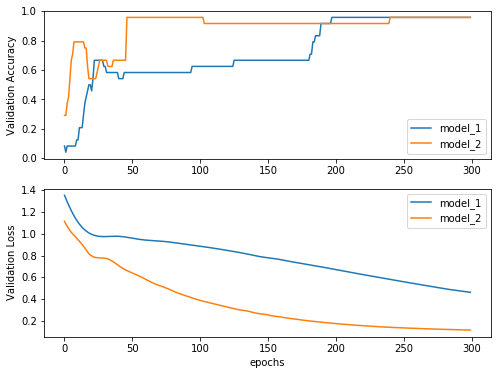

In [39]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [42]:
# evaluate the model
scores = model.evaluate(train_x, train_y)
print("\nAccuracy: %.2f%%" % (scores[1]*100))


96/96 [==============================] - 0s 66us/step

Accuracy: 97.92%


In [46]:
i=1
for model in models:
    score = model.evaluate(test_x, test_y, verbose=1)
    print('model_',i)
    print('Test Loss : {:.4f}'.format(score[0]))
    print('Test Acc  : {:.4f}'.format(score[1]))
    i +=1


30/30 [==============================] - 0s 45us/step
model_ 1
Test Loss : 0.5699
Test Acc  : 0.9333
30/30 [==============================] - 0s 60us/step
model_ 2
Test Loss : 0.0843
Test Acc  : 0.9667
